In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import os
os.listdir('/home/ashari/Documents/Dicoding/Machine Learning Pemula')
print()

In [4]:
iris= pd.read_csv('data/Iris.csv')

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Menghilangkan kolom yang tidak digunakan


In [11]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Split X dan Y

In [15]:
iris_y = iris['Species']
iris_x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [18]:
y_train, y_test, x_train, x_test = train_test_split(iris_y, iris_x, test_size=0.2)

In [21]:
tree_model = DecisionTreeClassifier()

In [23]:
scores = cross_val_score(tree_model, x_train, y_train, cv=10)
print(scores)
print('')
print("Rata-rata akurasi 10 CV adalah {0:0.2f}%".format(scores.mean()))

[0.91666667 0.83333333 0.91666667 1.         0.83333333 1.
 0.91666667 1.         1.         0.83333333]

Rata-rata akurasi 10 CV adalah 0.93%


In [24]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
tree_model.predict(x_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [26]:
from sklearn import metrics

In [28]:
print('Akurasi: {0:0.4f}'.format(metrics.accuracy_score(y_test, tree_model.predict(x_test))))
print('Confusion Matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, tree_model.predict(x_test))))
print('Ketepatan Klasifikasi')
print('{0}'.format(metrics.classification_report(y_test, tree_model.predict(x_test))))

Akurasi: 1.0000
Confusion Matrix
[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
Ketepatan Klasifikasi
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [89]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

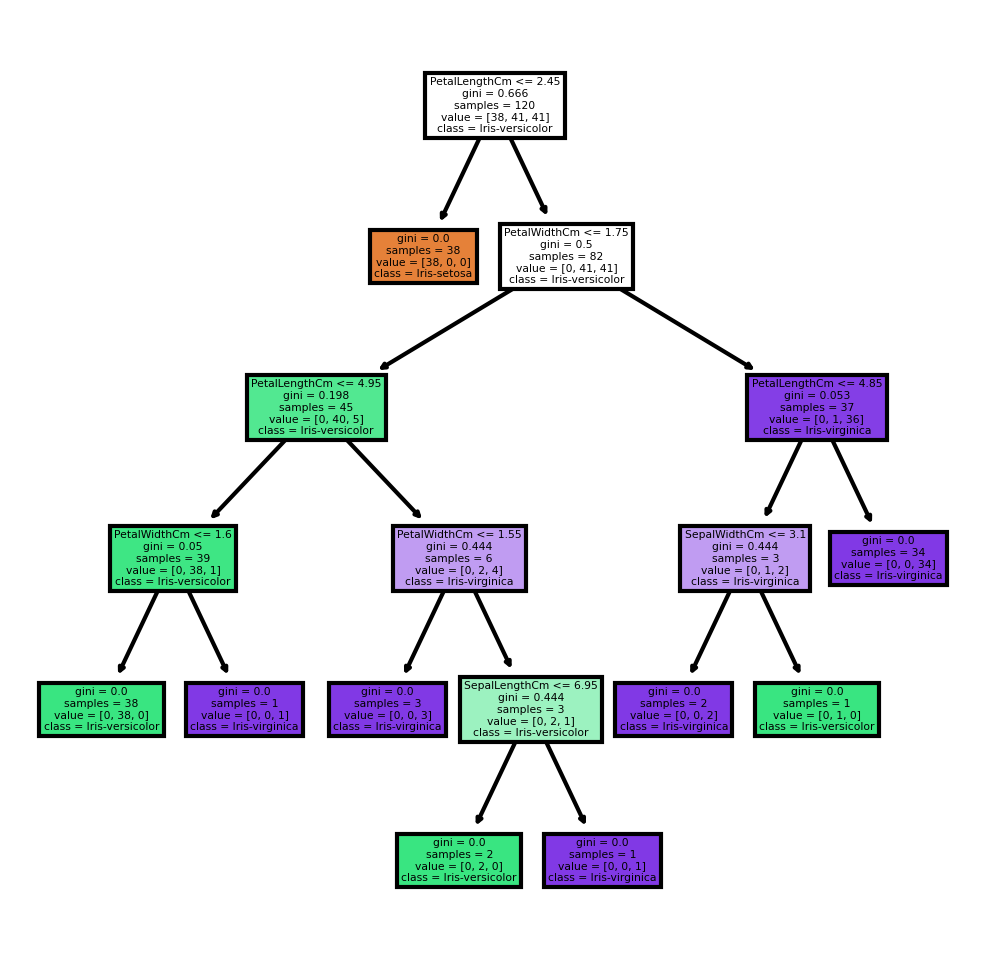

In [98]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(tree_model,
               feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               filled = True);

fig.savefig('imagename.png')